# importing required packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#models
from sklearn.linear_model import LogisticRegression

#dataset
from sklearn.datasets import fetch_openml

from sklearn.model_selection import cross_val_score

# fatching data

In [2]:
mnist= fetch_openml("mnist_784")

C:\python10\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# view datasets

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
mnist.data.loc[0]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [7]:
# converting data into numpy array
data = np.array(mnist.data)
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
data.shape

(70000, 784)

In [11]:
labels = mnist.target
labels

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [12]:
labels.shape

(70000,)

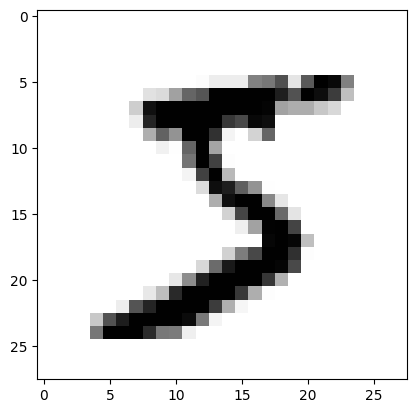

In [13]:
# looking for few handwritten digits
plt.imshow(data[0].reshape(28,28), cmap= plt.cm.binary, interpolation= "nearest")

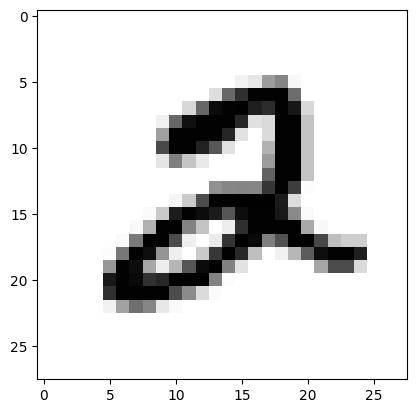

In [14]:
plt.imshow(data[5].reshape(28,28), cmap= plt.cm.binary, interpolation= "nearest")

# train-test splitting
* in mnist data is splitted into train test sets already
* first 60000 are train set and 10000 are test set

In [15]:
digit_train_features, digit_test_features= data[:60000], data[60000:]

In [16]:
digit_train_labels, digit_test_labels= np.array([i=="2" for i in labels[:60000]]).astype(np.int8), np.array([i=="2" for i in labels[60000:]]).astype(np.int8)
digit_train_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [17]:
digit_train_labels_arc, digit_test_labels_arc= np.array([i=="2" for i in labels[:60000]]), np.array([i=="2" for i in labels[60000:]])
digit_test_labels_arc


array([False,  True, False, ..., False, False, False])

In [18]:
pd.DataFrame(digit_train_labels).value_counts()

0    54042
1     5958
Name: count, dtype: int64

In [19]:
pd.DataFrame(digit_train_labels).value_counts()

0    54042
1     5958
Name: count, dtype: int64

<h3> Training data </h3>

* features:- digit_train_features

* labels:- digit_train_labels
    
<h3> Testing data </h3>

* features- digit_test_features

* labels- digit_test_labels

# Model Trainning

In [20]:
clf= LogisticRegression(tol= 0.1)
clf.fit(digit_train_features,digit_train_labels)

C:\python10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [21]:
clf.predict([data[0]])

array([0], dtype=int8)

In [22]:
clf.predict([data[5]])

array([1], dtype=int8)

In [23]:
lr_predict= clf.predict(digit_train_features)
lr_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

# Cross Validation for Accuracy

In [24]:
a= cross_val_score(clf, digit_train_features, digit_train_labels, cv= 3, scoring="accuracy")
print(a)

C:\python10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[0.9769  0.97725 0.98015]


C:\python10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
a

array([0.9769 , 0.97725, 0.98015])

In [26]:
print(a)

[0.9769  0.97725 0.98015]


* by jus print 0 it accuracy will be 90% so accuracy is not good matrics for classifier

# Accuracy of LR clf is [0.9769  0.97725 0.98015]

# Evaluating Classifiers

In [27]:
from sklearn.model_selection import cross_val_predict
clf_predict= cross_val_predict(clf, digit_train_features, digit_train_labels, cv= 3)
clf_predict

C:\python10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [28]:
pd.DataFrame(clf_predict).value_counts()

0    54404
1     5596
Name: count, dtype: int64

# Evaluate Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digit_train_labels, clf_predict)

array([[53566,   476],
       [  838,  5120]], dtype=int64)

# precision and recall

In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(digit_train_labels, clf_predict)

0.9149392423159399

In [32]:
recall_score(digit_train_labels, clf_predict)

0.8593487747566297

# F1 Score

In [33]:
from sklearn.metrics import f1_score
f1_score(digit_train_labels, clf_predict)

0.8862731521550978

# precision recall curve

In [34]:
from sklearn.metrics import precision_recall_curve
y_score= cross_val_predict(clf, digit_train_labels, clf_predict, method= "decision_function", cv= 3)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
precision_recall_curve(digit_train_labels, clf_predict)

In [ ]:
precisions, recalls, thresholds= precision_recall_curve(digit_train_labels, y_score)

In [ ]:
precisions

In [ ]:
recalls

In [ ]:
thresholds

In [ ]:
# plotting precision-recall curve
plt.plot(thresholds, precisions[:-1], "b--", label= "precision")
plt.plot(thresholds, recalls[:-1], "g-", label= "recall")
plt.xlabel("Thresholds")
plt.ylim([0,1])
plt.legend(loc="upper left")
plt.title("precision-recall curve")
plt.show()